
# Project: Investigating a Movie Dataset:
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> In this notebook we will be exploring a data set that contains information about 10,000 movies collected from
The Movie Database (TMDb).
Through our investigation we will try to find answers to these questions: 
- Is there a correlation between a movie popularity and its budget?
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues? 

But first we will import the important libraties we will be using through our analysis. and them load the movie data set into our notebook. Let's get started. 


In [1]:
# Importing packages will be using
from datetime import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#using this to ensure our plots inside our notebook
%matplotlib inline 



<a id='wrangling'></a>
## Data Wrangling

> First we start by loading our data, then we clean the data to ensure it is in great quality before we start our analysis. Main things we take into consideration here is to check the data types, checking the null values and deciding how to deal with them, looking for duplicates and removing them. Keep in mind to remove any other peculiarties that may be specific to this data set as well before the explatory step.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df_mov_orig= pd.read_csv("tmdb-movies.csv")
df_mov_orig.head(1)
print(df_mov_orig.shape)

(10866, 21)


In [3]:
df_mov_orig.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Cleaning

In the next part we will try to check the different data types ensuring and look for null values.

In [4]:
#Exploring Data types of each column:
df_mov_orig.dtypes
#df_mov.release_date[:5]

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
#df_mov[df_mov.popularity== df_mov.popularity.min()]

df_mov_orig.release_year.tail()

10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, dtype: int64

#### Examininig Duplicates

Then we check to see the duplicates

In [6]:
print("Duplicates sum is: ", df_mov_orig.duplicated().sum(), "\n")
print("The shape before removing the duplicates is: ", df_mov_orig.shape)

Duplicates sum is:  1 

The shape before removing the duplicates is:  (10866, 21)


From above we notice there is a single a single duplicated in our data, so we will drop it then test again to confirm we have no more duplicates.

In [7]:
df_mov_v1= df_mov_orig.drop_duplicates()

We test once again for duplicates to find there are no more and we notice that the number of row decreased by one since we remove the duplicate that was in our data.

In [8]:
print("Duplicates sum is: ", df_mov_v1.duplicated().sum(), "\n")
print("The shape before removing the duplicates is: ", df_mov_v1.shape)

Duplicates sum is:  0 

The shape before removing the duplicates is:  (10865, 21)


#### Null Values Checking

Then we start looking at the null values in order to decided what to do with them.

In [9]:
print(df_mov_v1.shape, "\n")
df_mov_v1.info()

(10865, 21) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj 

From the info above, now we know that the columns that contains null values are:
- imdb_id
- cast
- homepage
- director
- tagline
- keywords
- overview
- genres
- production_companies

Some of these columns has almost a siginificant amount of data about the movies production and may be important for further analysis so we will be keeping most of them even if we may not be using them to answer our current questions.
One particular column won't be of much help at all since it is missing over 80% of the data in addition it only represents the webpage of each movie, so it does not signify much. So we will be dropping the homepage column.

In [10]:
#dropping the "homepage" column from our data frame
df_mov_v2= df_mov_v1.drop(columns= "homepage")
df_mov_v2.shape

(10865, 20)

In [11]:
df_mov_v3= df_mov_v2.dropna()

For the non-numeric columns we will be dropping all the null entries before starting to work with our data.

So we will be droping null values in the following columns: imdb_id, cast, director, tagline, keywords, overview, genres, production_companies

In [12]:
print(df_mov_v3.shape, "\n")
df_mov_v3.info()

(7030, 20) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7030 entries, 0 to 10865
Data columns (total 20 columns):
id                      7030 non-null int64
imdb_id                 7030 non-null object
popularity              7030 non-null float64
budget                  7030 non-null int64
revenue                 7030 non-null int64
original_title          7030 non-null object
cast                    7030 non-null object
director                7030 non-null object
tagline                 7030 non-null object
keywords                7030 non-null object
overview                7030 non-null object
runtime                 7030 non-null int64
genres                  7030 non-null object
production_companies    7030 non-null object
release_date            7030 non-null object
vote_count              7030 non-null int64
vote_average            7030 non-null float64
release_year            7030 non-null int64
budget_adj              7030 non-null float64
revenue_adj             703

In [13]:
df_mov_v3.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7030.000000,7030.000000,7.030000e+03,7.030000e+03,7030.000000,7030.000000,7030.000000,7030.000000,7.030000e+03,7.030000e+03
mean,51923.701422,0.829578,2.084592e+07,5.933303e+07,104.849075,312.752205,6.013329,1999.380939,2.501234e+07,7.645232e+07
std,81410.657714,1.180330,3.602527e+07,1.404243e+08,23.794219,693.268737,0.876545,13.469048,3.953679e+07,1.730569e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9540.250000,0.278587,0.000000e+00,0.000000e+00,92.000000,24.000000,5.500000,1992.000000,0.000000e+00,0.000000e+00
50%,14738.500000,0.506241,5.000000e+06,4.859580e+06,101.000000,73.000000,6.100000,2003.000000,6.951084e+06,6.457481e+06
75%,46964.750000,0.956460,2.600000e+07,5.473358e+07,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.528359e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Reight before starting our exploratory step, we do a quick look on the statics of the data, we notice that some of the runtime values does not make sense at all. These values are the one that have runtime= 0. 
So we shall be dropping these entries as well 

In [14]:
df_rt0= df_mov_v3.query("runtime== 0")
df_rt0.index

Int64Index([334, 1289, 1293], dtype='int64')

In [15]:
df_mov_v3.drop(index= [334, 1289, 1293], inplace= True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Now, we have cleaned our data by dropping all the duplicates, null values from our data frame, in addiotion to some entries that did not make sense such as entries that have runtime= 0. Our data now is clean and ready to explor and answer the question we have posed in the introduction of this notebook. 

In [16]:
df_mov_v3.shape

(7027, 20)

<a id='eda'></a>
## Exploratory Data Analysis

Now that we have cleaned our data, let's answer the questions that we have posed at the beginning of our notebook.
### Is there a correlation between a movie popularity and its budget?

In order to answer this question, we start by making a scatter plot between the budget of each movie and its popularity score. The budget will be on the x-axis since it is our independant value, while the popularity will be on the y-axis since it is the dependant score.

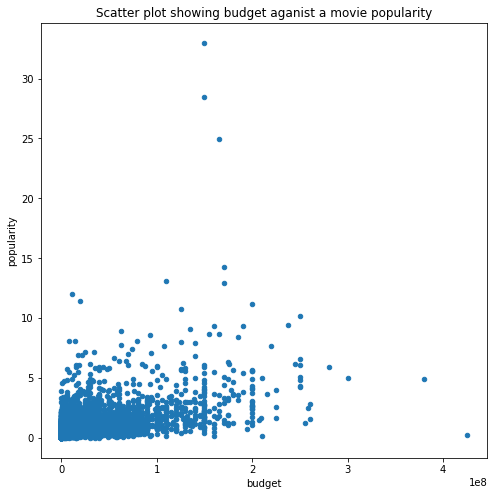

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_mov_v3.plot(x= 'budget', y= 'popularity', kind= "scatter", figsize= (8, 8));
plt.title("Scatter plot showing budget aganist a movie popularity");

From the plot above, we notice a trend among some of the movies that the more a budget movie is, the more its popularity score. But this is not consistant across the majority of the data set since through different budgets moveisachieve different levels of popularity. So we can safely the correlation between a movie popularity and its budget is week.

In [18]:
df_mov_v3.shape
df_mov_v3.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

### What kinds of properties are associated with movies that have high revenues?

In order to answer this question, first we define a movie with high revenue is a movie that has revenue_adj above the revenue_adj mean. 

Note: I have used revenue_adj instead of revenue since this gives our analysis a more realistic look to the current scene in the movie industry. Also, it provides a normalization and avoid the issue of inflation.
Then we look through the comparison of the revenue_adj with different aspects of our data set: geners, vote_average, budget_adj. 

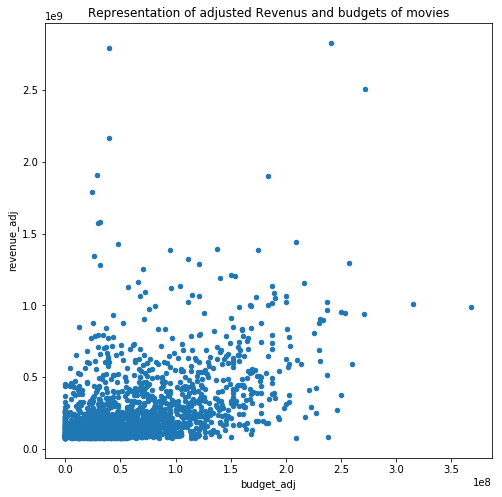

In [19]:
#Start to find movies with revenus higher than the mean
df_mov_HR= df_mov_v3.query("revenue_adj > revenue_adj.mean()")
df_mov_LR= df_mov_v3.query("revenue_adj <= revenue_adj.mean()")
df_mov_HR.plot(x= "budget_adj", y= "revenue_adj", kind= "scatter", figsize=(8,8));
plt.title("Representation of adjusted Revenus and budgets of movies");


Based on the previous plot, it is hard to say a higher move budget yields a higher movie in revenus.

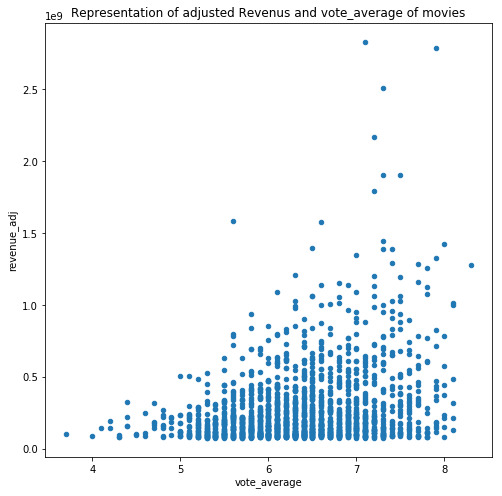

In [20]:
df_mov_HR.plot(x= "vote_average", y= "revenue_adj", kind= "scatter", figsize=(8,8));
plt.title("Representation of adjusted Revenus and vote_average of movies");

From the previous plot we can say that a movie with a higher vote_average get higher revenus.

Let's take a look and see if the generes have any attributes to the movie revenues. By a quick check we find that for the highest paid movies, there are over 600 uniqe genere combinations. Most of these genere combinations are unique (i.e. occurs only once) in our data set. In order to have some insights in what were the generes for the movies with the highest revenu, we will take a look on the most occured generes.

In [21]:
print("# of uniqure generes is: ", df_mov_HR.genres.nunique()) #Totoal number of unique generes we have for movies with the highest revenus
print(df_mov_HR.genres.value_counts()) #what is the count for each genere

# of uniqure generes is:  666
Comedy                                            111
Drama                                              75
Comedy|Romance                                     50
Drama|Romance                                      30
Comedy|Drama|Romance                               28
Comedy|Drama                                       25
Horror|Thriller                                    23
Action|Thriller                                    22
Horror                                             19
Adventure|Action|Thriller                          19
Action|Crime|Thriller                              18
Comedy|Family                                      17
Animation|Comedy|Family                            16
Animation|Family                                   15
Action|Comedy|Crime                                14
Action|Adventure|Thriller                          14
Comedy|Crime                                       12
Crime|Drama|Thriller                               1

From the above analysis we notice that most of the movies that had high revenus has something to do with comdey, let's have the top 5 highest generes.

In [22]:
#Querying to find the data for the highest uniqe generes
df_c= df_mov_HR.query('genres=="Comedy"');
df_d= df_mov_HR.query('genres=="Drama"');
df_cr= df_mov_HR.query('genres=="Comedy|Romance"');
df_dr= df_mov_HR.query('genres=="Drama|Romance"');
df_cdr= df_mov_HR.query('genres=="Comedy|Drama|Romance"');
df= df_c.append([df_d, df_cr, df_dr, df_cdr])
df.shape

(294, 20)

Let's make a pie chart showing what were the most common 5 generes amongst the movies with the most revenus

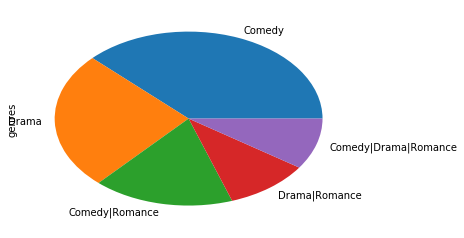

In [23]:
df["genres"].value_counts().plot(kind= "pie");

From this we notice that comdey movies have had over a very significant portion of higest movies in revenus. 

In [24]:
#summary of statistics for the movies with the highest revenus
df_mov_HR.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1738.000000,1738.000000,1.738000e+03,1.738000e+03,1738.000000,1738.000000,1738.000000,1738.000000,1.738000e+03,1.738000e+03
mean,31140.125432,1.761672,5.595313e+07,2.114306e+08,114.308976,916.281358,6.364730,1999.401036,6.582979e+07,2.729068e+08
std,59004.241010,1.927112,5.188863e+07,2.195688e+08,25.273918,1143.850247,0.721257,12.395922,5.271703e+07,2.620512e+08
min,11.000000,0.017498,0.000000e+00,1.087811e+07,44.000000,10.000000,3.700000,1960.000000,0.000000e+00,7.663473e+07
25%,1913.500000,0.782539,1.800000e+07,8.787680e+07,99.000000,214.250000,5.900000,1992.000000,2.717494e+07,1.146385e+08
50%,9646.000000,1.246508,4.000000e+07,1.395785e+08,111.000000,501.000000,6.400000,2002.000000,5.271723e+07,1.812040e+08
75%,20872.750000,2.066203,8.000000e+07,2.461060e+08,125.000000,1133.750000,6.900000,2009.000000,9.245751e+07,3.246124e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


<a id='conclusions'></a>
## Conclusions
So in our analysis we have focsed on exploring the answers for two questions, and based on our analysis we can say that a movie
sucess when it comes to revenus has a week correlation to its budget.

When looking through some of the properties that focues on what propoerties the highest movies in revens has in commen, we notice that the majority of these movies has the element of comdey in their geners. Even when we look through the top five generes we find that 3 of the top 5 generes have a comdy element in them.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0